In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = lambda x: x - 0.5
def g(x):
    x0 = 1.25
    return torch.where(x>x0, f(x), f(x0))

x_train = torch.tensor([-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4., ])
y_train = g(x_train)

In [3]:
class BigModel(torch.nn.Module):
    def __init__(self, activation_function) -> None:
        super().__init__()
        self.l1 = torch.nn.Linear(1,8, bias=True)
        self.l2 = torch.nn.Linear(8,1, bias=True)
        self.activation = activation_function
    
    def forward(self, x):
        x = x.reshape(-1,1)
        x = self.l1(x)
        return self.l2(self.activation(x))
    
loss_func = torch.nn.MSELoss()

def train_model(model, x_data, y_data, optimizer, N_steps=5000,loss_func=loss_func):
    loss_vals = []
    for step in range(N_steps):
        optimizer.zero_grad()
        loss = loss_func(model.forward(x_data), y_data.reshape(-1,1))
        loss_vals.append(loss)
        loss.backward()
        optimizer.step()
    return loss_vals

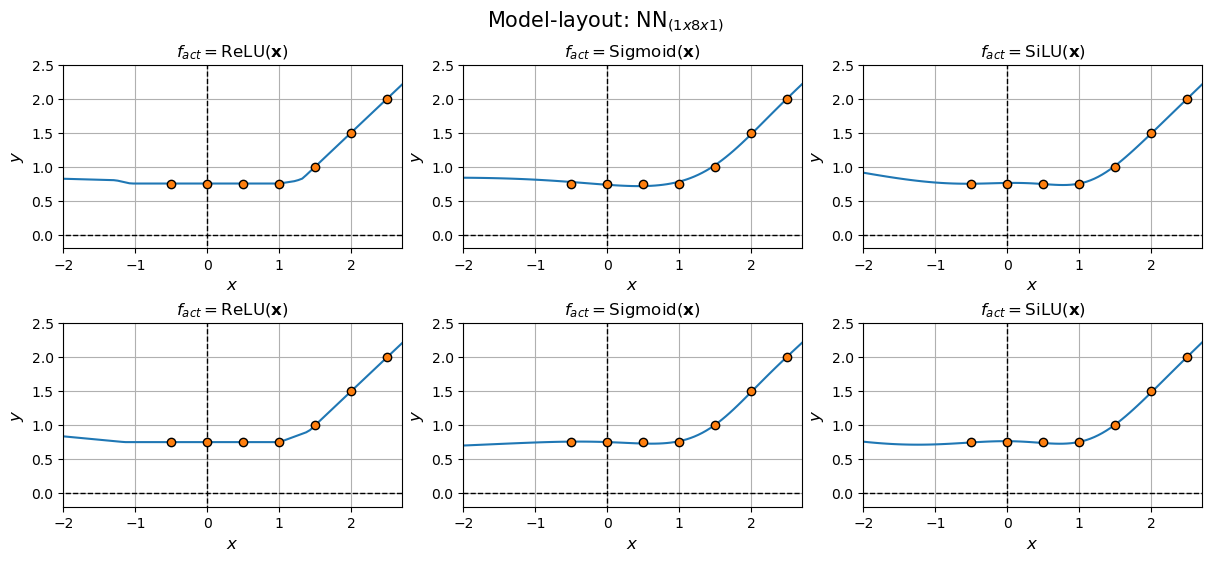

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(12,5.5), layout="constrained")
fig.suptitle(r"Model-layout: NN$_{(1x8x1)}$",fontsize=15)
activation_functions = {"ReLU":torch.nn.ReLU(), 
                        "Sigmoid":torch.nn.Sigmoid(), 
                        "SiLU":torch.nn.SiLU()}

xs = torch.linspace(-2.5,2.9, 100)

for plot_row in axs:
    for ax, active_func in zip(plot_row, activation_functions):
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        model = BigModel(activation_function=activation_functions[active_func])
        optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
        train_model(model=model, x_data=x_train, y_data=y_train, optimizer=optimizer, N_steps=10000) 
        ys = model.forward(xs)
        with torch.no_grad():
            ax.hlines(0.0,-10,10, colors="k", ls="--", lw=1)
            ax.vlines(0.0,-10,10, colors="k", ls="--", lw=1)
            ax.plot(xs, ys)
            ax.set_title(r"$f_{act}=$"+active_func+r"$(\bf{x}$$)$")
            ax.plot(x_train, y_train, 'o', markeredgecolor="k")
            ax.set_xlim([-2.0,2.7])
            ax.set_ylim([-0.2,2.5])
            ax.grid()



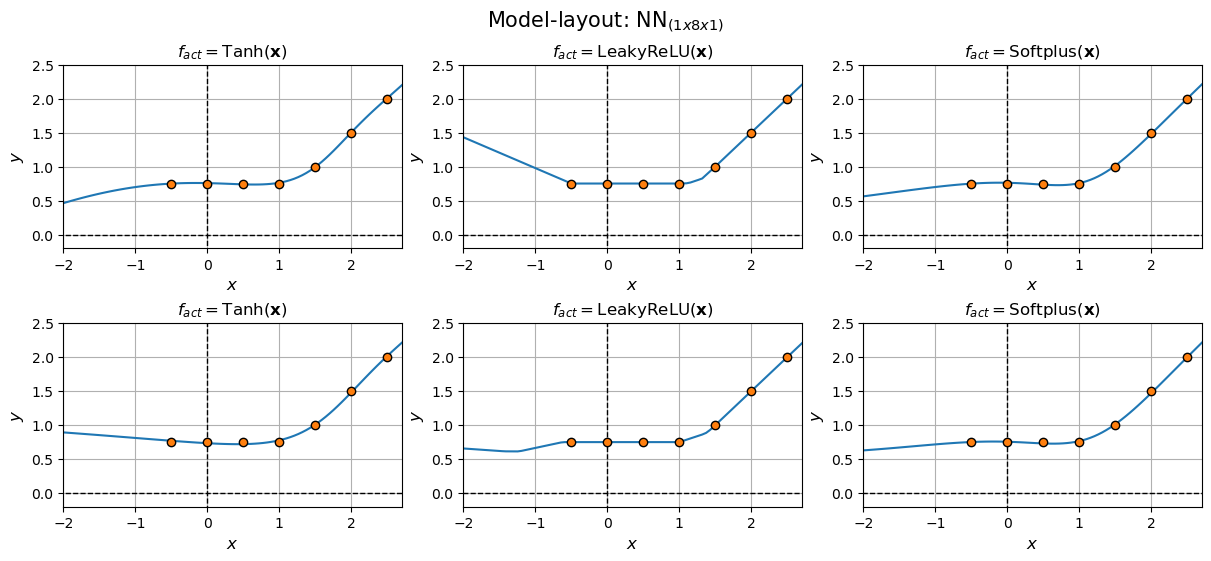

In [27]:
fig, axs = plt.subplots(2, 3, figsize=(12,5.5), layout="constrained")
fig.suptitle(r"Model-layout: NN$_{(1x8x1)}$",fontsize=15)
activation_functions = {"Tanh":torch.nn.Tanh(), 
                        "LeakyReLU":torch.nn.LeakyReLU(), 
                        "Softplus":torch.nn.Softplus()}

xs = torch.linspace(-2.5,2.9, 100)

for plot_row in axs:
    for ax, active_func in zip(plot_row, activation_functions):
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        model = BigModel(activation_function=activation_functions[active_func])
        optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
        train_model(model=model, x_data=x_train, y_data=y_train, optimizer=optimizer, N_steps=10000) 
        ys = model.forward(xs)
        with torch.no_grad():
            ax.hlines(0.0,-10,10, colors="k", ls="--", lw=1)
            ax.vlines(0.0,-10,10, colors="k", ls="--", lw=1)
            ax.plot(xs, ys)
            ax.set_title(r"$f_{act}=$"+active_func+r"$(\bf{x}$$)$")
            ax.plot(x_train, y_train, 'o', markeredgecolor="k")
            ax.set_xlim([-2.0,2.7])
            ax.set_ylim([-0.2,2.5])
            ax.grid()

